**Loading the dataset**

In [ ]:
# mount your drive to read your data (if you have your data in your drive or else simply load ypur data on collab)
from google.colab import drive
drive.mount('/content/drive')

# import pandas
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/hoc may/13 Build a Logistic Regression Model in Python from Scratch/Data (1)/Data/data_regression.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Mục mới

In [ ]:
# import pandas
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/hoc may/13 Build a Logistic Regression Model in Python from Scratch/Data (1)/Data/data_regression.csv")

In [ ]:
# get the first 10 rows
df.head(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0


**Inspecting and cleaning up the frame**

> Thêm khối trích dẫn



In [ ]:
# check for the missing values and dataframes
def inspection(dataframe):
  import pandas as pd
  import seaborn as sns
  print("Types of the variables we are working with:")
  print(dataframe.dtypes) # dtypes

  print("Total Samples with missing values:")

  print(df.isnull().any(axis=1).sum()) # null values

  print("Total Missing Values per Variable")
  print(df.isnull().sum())
  print("Map of missing values")
  sns.heatmap(dataframe.isnull())

Types of the variables we are working with:
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object
Total Samples with missing values:
82
Total Missing Values per Variable
year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_

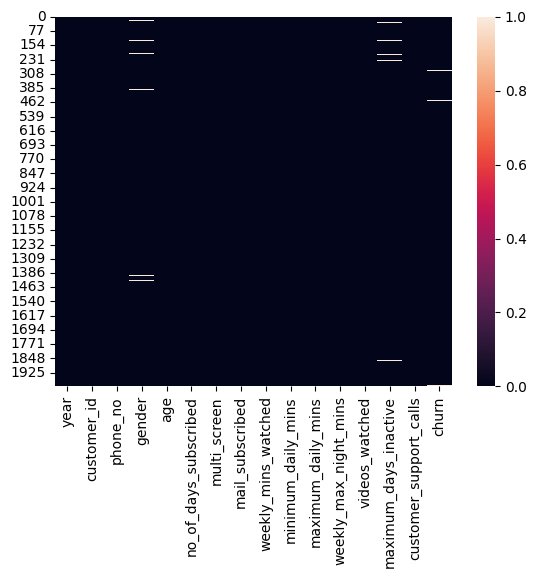

In [ ]:
inspection(df)

In [ ]:
df = df.dropna() # cleaning up null values

**Encoding categorical variables**

In [ ]:
df.head(5)

df.multi_screen.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# function for encoding categorical variables
def encode_categories (df,variables):
  from sklearn.preprocessing import OrdinalEncoder
  ord_enc = OrdinalEncoder()
  for v in variables:
    name = v+'_code' # add _code for encoded variables
    df[name] = ord_enc.fit_transform(df[[v]])
    print('The encoded values for '+ v + ' are:')
    print(df[name].unique())

In [ ]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,2015,993714,364-1969,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0


In [ ]:
# check for the encoded variables
encode_categories (df,['gender','multi_screen','mail_subscribed'])

The encoded values for gender are:
[0. 1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


**Do some data visualizations**

In [ ]:
def plot_scatterplots (df,cols_to_exclude,class_col):
  #this function returns scatterplots of all the variables in the dataset
  #against the classification variable,
  #for a quick data visualization
  import numpy as np
  import seaborn as sns
  import warnings
  warnings.filterwarnings("ignore")
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  for col in X.columns.difference([class_col]):
    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, col, class_col)

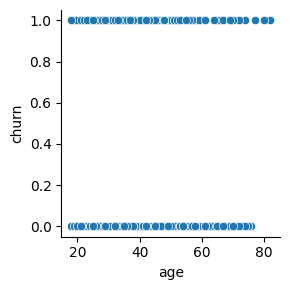

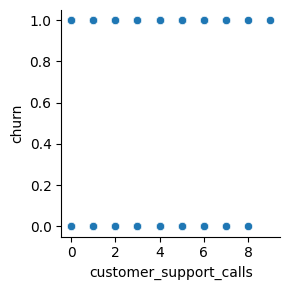

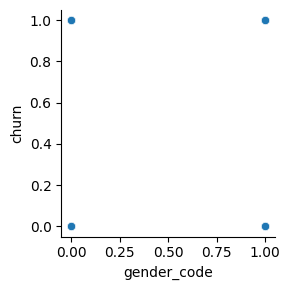

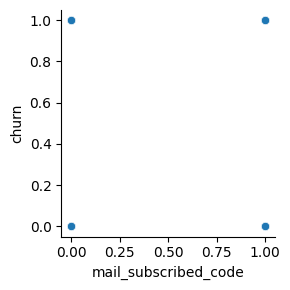

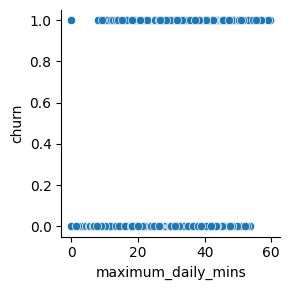

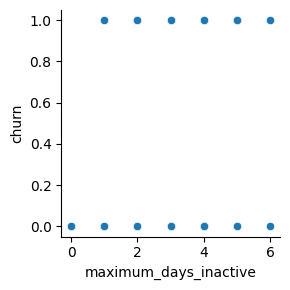

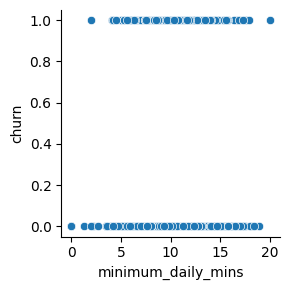

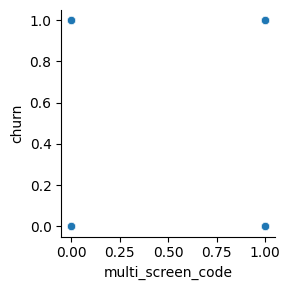

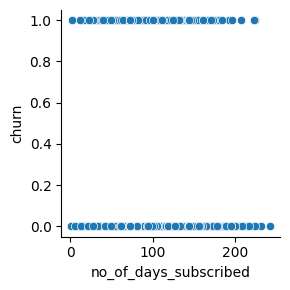

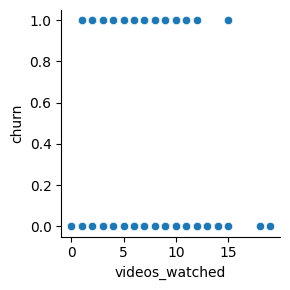

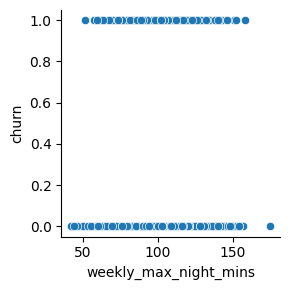

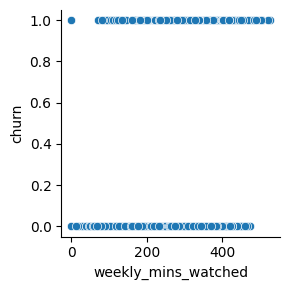

In [ ]:
# plot
plot_scatterplots (df,['customer_id','phone_no', 'year'],'churn')

In [ ]:
def full_diagnostic(df,class_col,cols_to_exclude):
  import seaborn as sns
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(df,hue = class_col)

In [ ]:
full_diagnostic(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
# function for creating plots for selective columns only
def selected_diagnotic(df,class_col,cols_to_eval):
  import seaborn as sns
  cols_to_eval.append(class_col)
  X = df[cols_to_eval] # only selective columns
  sns.pairplot(X,hue = class_col) # plot

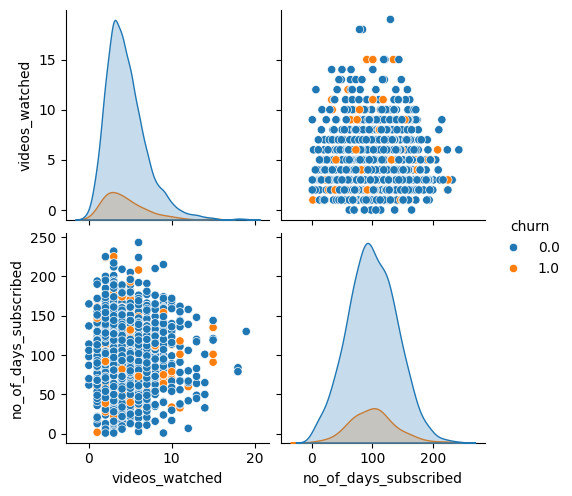

In [ ]:
selected_diagnotic(df,class_col = 'churn',cols_to_eval = ['videos_watched','no_of_days_subscribed'])

**Run the logistic regression**

In [ ]:
def logistic_regression(df,class_col,cols_to_exclude):
  import statsmodels.api as sm
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)] # unwanted columns

  ## Scaling variables
  ##from sklearn import preprocessing
  ##scaler = preprocessing.StandardScaler().fit(X)
  ##X_scaled = scaler.transform(X)


  #X_Scale = scaler.transform(X)
  y=df[class_col] # the target variable
  logit_model=sm.Logit(y,X)
  result=logit_model.fit() # fit the model
  print(result.summary2()) # check for summary

In [ ]:
logistic_regression(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   churn              Pseudo R-squared:   0.137     
Date:                 2024-10-19 14:47   AIC:                1315.1404 
No. Observations:     1918               BIC:                1381.8488 
Df Model:             11                 Log-Likelihood:     -645.57   
Df Residuals:         1906               LL-Null:            -748.02   
Converged:            1.0000             LLR p-value:        7.1751e-38
No. Iterations:       7.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [ ]:
import math
math.exp(1.9511)

7.036423390843554

**Run the ML Model**

In [ ]:
def prepare_model(df,class_col,cols_to_exclude):
## Split in training and test set
  from sklearn.model_selection import train_test_split
  import numpy as np
  ##Selecting only the numerical columns and excluding the columns we specified in the function
  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  ##Selecting y as a column
  y=df[class_col]
  global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split

In [ ]:
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score,classification_report
  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train) # fit the model
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test) # make predictions on th test data
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred)) # check for classification report
  print("The area under the curve is: %0.2f"%logit_roc_auc)  # check for  AUC


In [ ]:
prepare_model(df,class_col='churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.55


In [ ]:
def confusion_matrix(y_test,y_pred):
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y_test, y_pred) # confusion matrix
  print(confusion_matrix)

  tn, fp, fn, tp = confusion_matrix.ravel()
  print('TN: %0.2f'% tn)
  print('TP: %0.2f'% tp)
  print('FP: %0.2f'%fp)
  print('FN: %0.2f'%fn)

In [ ]:
def roc_curve (logreg,X_test,y_test):
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import roc_curve
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test)) # ROC curve
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [ ]:
prepare_model(df,class_col='churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
confusion_matrix(y_test,y_pred)

[[504   9]
 [ 55   8]]
TN: 504.00
TP: 8.00
FP: 9.00
FN: 55.00


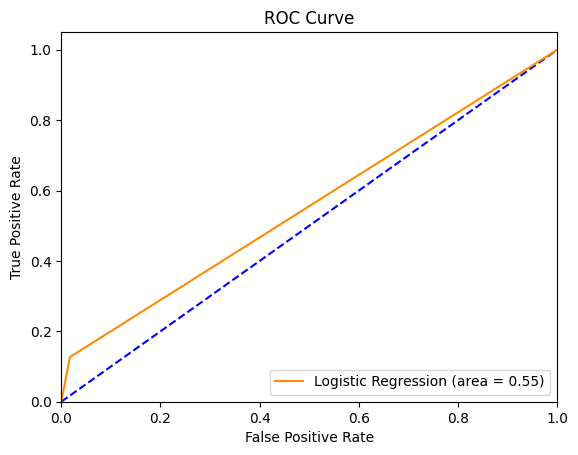

In [ ]:
roc_curve (logreg,X_test,y_test)

**Saving & Running the Model**

In [ ]:
# save the model using pickle function
import pickle
pickle.dump(logreg, open('model1.pkl', 'wb'))

In [ ]:
# load the saved model
model = pickle.load(open('model1.pkl', 'rb'))

In [ ]:
# make predictions on the test data
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Dealing with Class Imbalance**

In [ ]:
# check the target variable
df['churn'].describe()

,churn
count,1918.000000
mean,0.131908
std,0.338479
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# class imbalance method 1
def run_model_bweights(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight = 'balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

In [ ]:
run_model_bweights(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.75      0.79       576

The area under the curve is: 0.76


In [ ]:
# class imbalance method 2
def run_model_aweights(X_train,X_test,y_train,y_test,w):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [ ]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       513
         1.0       1.00      0.02      0.03        63

    accuracy                           0.89       576
   macro avg       0.95      0.51      0.49       576
weighted avg       0.90      0.89      0.84       576

The area under the curve is: 0.51


In [ ]:
# class imbalance method 3
def adjust_imbalance (X_train,y_train,class_col):
  from sklearn.utils import resample
  import pandas as pd
  X = pd.concat([X_train, y_train], axis=1)

  # separate the 2 classes
  class0 = X[X[class_col]==0]
  class1 = X[X[class_col]==1]

  # Case 1 - bootstraps from the minority class
  if len(class1)<len(class0):
    resampled = resample(class1,
                              replace=True,
                              n_samples=len(class0),
                              random_state=10)
    resampled_df = pd.concat([resampled, class0])

  # Case 1 - ressamples from the majority class
  else:
    resampled = resample(class1,
                              replace=False,
                              n_samples=len(class0),
                              random_state=10)
    resampled_df = pd.concat([resampled, class0])

  return resampled_df

In [ ]:
resampled_df = adjust_imbalance (X_train,y_train,class_col = 'churn')

In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       339
         1.0       0.74      0.68      0.71       353

    accuracy                           0.71       692
   macro avg       0.71      0.71      0.71       692
weighted avg       0.71      0.71      0.71       692

The area under the curve is: 0.71


In [ ]:
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input.
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist()
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85       513
         1.0       0.27      0.71      0.39        63

    accuracy                           0.75       576
   macro avg       0.61      0.74      0.62       576
weighted avg       0.88      0.75      0.80       576

The area under the curve is: 0.74


**Predictions**

In [ ]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85       513
         1.0       0.27      0.71      0.39        63

    accuracy                           0.75       576
   macro avg       0.61      0.74      0.62       576
weighted avg       0.88      0.75      0.80       576

The area under the curve is: 0.74


**Feature selection**

In [ ]:
class_col = 'churn'
cols_to_exclude=['customer_id','phone_no', 'year']

# function for feature selection
def var_threshold_selection(df,cols_to_exclude,class_col,threshold):
  from sklearn.feature_selection import VarianceThreshold
  import numpy as np
  from sklearn import preprocessing

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  ## Scaling variables
  scaler = preprocessing.StandardScaler().fit(X)
  X_scaled = scaler.transform(X)
  var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
  var_thr.fit(X_scaled)
  var_thr.get_support()

  global selected_cols
  selected_cols = X.columns[var_thr.get_support()]

  print("The selected features are: ")
  print(list(selected_cols))

In [ ]:
var_threshold_selection(df,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn',threshold=1)

The selected features are: 
['maximum_daily_mins', 'maximum_days_inactive', 'weekly_mins_watched']


In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 'minimum_daily_mins',
                                                                'weekly_max_night_mins', 'videos_watched',
                                                                'customer_support_calls', 'churn', 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.59       339
         1.0       0.60      0.55      0.57       353

    accuracy                           0.58       692
   macro avg       0.58      0.58      0.58       692
weighted avg       0.59      0.58      0.58       692

The area under the curve is: 0.58


In [ ]:
# RFE for feature selection
def rfe_selection(df,cols_to_exclude,class_col,model):
  import warnings
  warnings.filterwarnings("ignore")
  import numpy as np
  from sklearn.feature_selection import RFE

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  y = df[class_col]

  rfe = RFE(model)
  rfe = rfe.fit(X, y) # fit the model
  global selected_cols
  selected_cols = X.columns[rfe.support_]

  print("The selected features are: ")
  print(list(selected_cols))


In [ ]:
rfe_selection(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'],model=logreg)

The selected features are: 
['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code']


In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
                                                                'weekly_max_night_mins',
                                                                 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       339
         1.0       0.71      0.69      0.70       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70
